In [250]:
import numpy as np;
import pandas as pd;
import pyclustering as pycl;
from pyclustering.cluster.xmeans import xmeans, splitting_type;
from pyclustering.cluster import cluster_visualizer;
from sklearn.preprocessing import LabelEncoder;
from sklearn.decomposition import PCA;
import matplotlib.pyplot as plt;
from pyclustering.utils import timedcall;
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer;

In [251]:
%config IPCompleter.greedy=True

In [252]:
df = pd.read_csv('C:/Users/Shobhit Agrawal/Downloads/Master Thesis/Data/iris.csv')

In [253]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to integer**

In [254]:
enc = LabelEncoder();
enc.fit(df['species']);
df['species'] = enc.transform(df['species'])

**Principal Component Analysis for Dimentionality reduction**

In [255]:
pca = PCA(n_components=3);
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [256]:
df_2d=pca.transform(df)

In [257]:
df_2d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

**Significance level of dimention after PCA**

In [258]:
print(pca.explained_variance_ratio_)

[0.92264045 0.04810411 0.01829962]


In [259]:
sample=df_2d.tolist()

In [260]:
sample

[[-2.8655066941799587, 0.30278044218553335, 0.048489721083216586],
 [-2.8932133898737877, -0.1769871462954614, -0.168798182239855],
 [-3.0557490968360286, -0.16800628887325073, 0.05654241487364964],
 [-2.9212490213057016, -0.325027211241508, 0.00980010810212606],
 [-2.9067514031274237, 0.3023327236144092, 0.15372030233594347],
 [-2.4889998762241143, 0.7397271868671295, 0.2006792395863739],
 [-2.9910653468314607, -0.11673983401330126, 0.2503858210508838],
 [-2.8110529077169413, 0.15563581438173626, 0.016626848919742976],
 [-3.052480315581599, -0.5896875831557234, -0.009287332400670034],
 [-2.854701477034372, -0.11163329418724174, -0.16495585757231257],
 [-2.700856794128181, 0.6362988400049809, 0.023453589737360114],
 [-2.7978438302013897, 0.008043468006814353, 0.0899945580089967],
 [-2.960340268705976, -0.23902533286212033, -0.16705986051968502],
 [-3.3675721647873047, -0.5536865786948969, 0.09819630254772616],
 [-2.8307995477413526, 1.1465907493216034, 0.07491863437912838],
 [-2.587967

In [261]:
%%time
#initial_centers = kmeans_plusplus_initializer(sample, 2).initialize();
xmeans_instance = xmeans(sample,ccore=True);
xmeans_instance.process();
(ticks, _) = timedcall(xmeans_instance.process);
clusters = xmeans_instance.get_clusters();
centers = xmeans_instance.get_centers();

Wall time: 5.98 ms


In [262]:
print('Execution Time: ',ticks,'Sec')

Execution Time:  0.0027835388136736583 Sec


**Centroids of newly formed clusters**

In [263]:
centers

[[-2.8244415138607297, 0.17263588799042293, 0.04898480281698772],
 [0.08610912189325592, -0.4997008891163898, -0.14736952376172194],
 [3.3237592584964424, 0.7048405349061677, -0.2239992085728007],
 [2.3610495427701452, 0.08442267866359629, 0.2754765100334169],
 [1.6058341762253348, -0.5571380443527786, 0.310445158354265],
 [0.9802515480139368, 0.1764446937504957, -0.3379939582480131]]

In [264]:
number_of_clusters = len(centers)

**Number of Clusters found**

In [265]:
print('Number of Clusters Found = '+str(number_of_clusters))

Number of Clusters Found = 6


In [266]:
clusters

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [53,
  55,
  57,
  59,
  60,
  61,
  62,
  64,
  66,
  67,
  69,
  71,
  79,
  80,
  81,
  82,
  84,
  88,
  89,
  90,
  92,
  93,
  94,
  95,
  96,
  98,
  99],
 [105, 107, 109, 117, 118, 122, 125, 130, 131, 135],
 [100,
  102,
  103,
  104,
  108,
  110,
  111,
  112,
  115,
  116,
  120,
  124,
  128,
  129,
  132,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148],
 [101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149],
 [50,
  51,
  52,
  54,
  56,
  58,
  63,
  65,
  68,
  70,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  83,
  85,
  86,
  87,
  91,
  97]]

[50, 27, 10, 25, 15, 23]


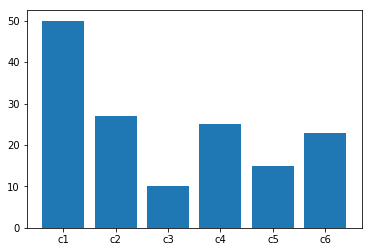

In [267]:
c=[]
for cluster in clusters:
    c.append(len(cluster))
print(c)
cluster_label=['c1','c2','c3','c4','c5','c6']
plt.bar([1,2,3,4,5,6],height=c,tick_label=cluster_label)
plt.show()

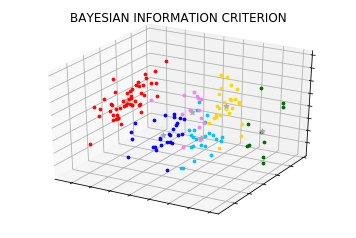

In [268]:
#Visualize the cluster across principal components
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, sample);
visualizer.set_canvas_title("BAYESIAN INFORMATION CRITERION");
visualizer.append_cluster(centers, None, marker = '*');
visualizer.show();

In [269]:
sample1=pd.DataFrame(sample).values
centers1=np.array(centers)

In [270]:
sample1

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

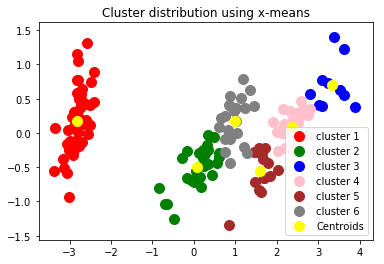

In [271]:
#Scatter plot with better cluster visualization
plt.scatter(sample1[clusters[0],0],sample1[clusters[0],1],s=100,c='red',label='cluster 1')
plt.scatter(sample1[clusters[1],0],sample1[clusters[1],1],s=100,c='green',label='cluster 2')
plt.scatter(sample1[clusters[2],0],sample1[clusters[2],1],s=100,c='blue',label='cluster 3')
plt.scatter(sample1[clusters[3],0],sample1[clusters[3],1],s=100,c='pink',label='cluster 4')
plt.scatter(sample1[clusters[4],0],sample1[clusters[4],1],s=100,c='brown',label='cluster 5')
plt.scatter(sample1[clusters[5],0],sample1[clusters[5],1],s=100,c='grey',label='cluster 6')

#plot centers of respective clusters
plt.scatter(centers1[:,0],centers1[:,1],s=100,c='yellow',label='Centroids')

plt.title('Cluster distribution using x-means')
plt.legend()